# Tópico 11 – Simulação [<img src="images/colag_logo.svg" style="float: right; vertical-align: middle; width: 42px; height: 42px;">](https://colab.research.google.com/github/urielmoreirasilva/urielmoreirasilva.github.io/blob/main/aulas/T%C3%B3pico%2011/11%20%E2%80%93%20Simulacao.ipynb) [<img src="images/github_logo.svg" style="float: right; margin-right: 12px; vertical-align: middle; width: 36px; height: 36px;">](https://github.com/urielmoreirasilva/urielmoreirasilva.github.io/blob/main/aulas/T%C3%B3pico%2011/11%20%E2%80%93%20Simulacao.ipynb)

A simulação de dados é essencial na Estatística e em Ciência de Dados. Vamos aprender a combinar o que aprendemos sobre iteração e sobre arrays para realizar simulações e aproximar probabilidades!

### Resultados Esperados

1. Introduzir método `np.random` para simulação.
1. Aprender sobre como utilizar simulação para aproximar probabilidades.
1. Discutir sobre o uso das simulações como uma alternativa às soluções exatas para problemas complexos.

### Referências
- [CIT, Capítulo 9](https://inferentialthinking.com/)

Material adaptado do [DSC10 (UCSD)](https://dsc10.com/) por [Flavio Figueiredo (DCC-UFMG)](https://flaviovdf.io/fcd/) e [Uriel Silva (DEST-UFMG)](https://urielmoreirasilva.github.io)

In [2]:
# Imports: Matplotlib, Numpy, BabyPandas e Pandas.
import matplotlib.pyplot as plt
import numpy as np
import babypandas as bpd
import pandas as pd
plt.style.use('ggplot')

## Simulação

### Ideias básicas

- Suponha que queiramos responder a seguinte pergunta: "Qual é a probabilidade de obtermos 60 ou mais caras no lançamento de 100 moedas (justas)?" 🤔

- Embora com certeza _seja possível_ calcular essa probabilidade "manualmente", isto é, utilizando Matemática e Probabilidade, podemos também aproximá-la utilizando um computador:
  
1. Descubra como fazer o experimento correspondente (ou seja, jogar 100 moedas).
1. Execute o experimento várias vezes.
1. Encontre a proporção de experimentos em que o número de caras foi igual a 60 ou mais.

- Nesse curso, esse será nosso principal uso para técnicas de **simulação**.
- Isto, é, utilizaremos simulação para aproximar a solução _exata_ do problema no qual estamos interessados.
- Embora a maior parte dos problemas que trabalharemos nesse curso _admitam soluções analíticas_, técnicas de simulação são facilmente generalizáveis para os casos onde uma solução analítica seja muito complicada algebricamente, numericamente instável, ou muitas vezes **nem exista**.

- Apesar do poder das técnicas de simulação ser evidente quando aplicadas para resolver problemas complexos, devemos sempre lembrar que a simulação nos dá sempre uma solução **aproximada**.
    - Na maior parte das situações, podemos escolher o quão _boa_ essa aproximação será (em geral ao custo de um esforço computacional maior).
- De qualquer maneira, é sempre uma boa ideia realizarmos uma **análise de sensibilidade** para tentar detectar se nossas aproximações sofrem de algum **viés**, ou **erro sistemático**. 

### Simulando um experimento aleatório

- Para simular um experimento aleatório, precisamos de uma função adequada para gerar _números aleatórios_ no computador.
- Esses números então serão utilizados para representar os resultados de um experimento aleatório (como por exemplo lançar uma moeda, lançar um dado, etc.).

- Uma função muito útil nesse contexto é `np.random.choice(options)`.
    - A entrada dessa função, `options`, é uma lista ou array com todos os possíveis resultados do experimento desejado.
    - A saída dessa função é um elemento selecionado aleatoriamente em `options`.
    - Como padrão, todos os elementos de `options` têm a mesma probabilidade de serem escolhidos, isto é, `np.random.choice` amostra probabilidades **uniformes**.

In [10]:
# Simulando o lançamento de uma moeda (justa).
# Nota: execute essa célula mais de uma vez para ver algo interessante!
np.random.choice(['Heads', 'Tails'])

'Heads'

In [11]:
# Simulando o lançamento de uma dado (de 6 lados).
# Nota: execute essa célula mais de uma vez para ver algo interessante!
np.random.choice(np.arange(1, 7))

3

### Simulando múltiplos experimentos aleatórios

- Para simularmos `n` experimentos aleatórios, basta invocar `np.random.choice(options, n)`.
- A saída correspondente será um array de `n` elementos selecionados aleatoriamente de `options`.

In [13]:
# Simulando o lançamento de 10 moedas (justas).
# Nota: execute essa célula mais de uma vez para ver algo interessante!
np.random.choice(['Heads', 'Tails'], 10)

array(['Tails', 'Heads', 'Tails', 'Heads', 'Heads', 'Heads', 'Heads',
       'Heads', 'Heads', 'Heads'], dtype='<U5')

### Com reposição ou sem reposição? 🤔

- Como padrão, `np.random.choice` seleciona elementos de `options` **com** reposição.
- Isso significa que, após uma opção ser selecionada, essa opção estará disponível para ser selecionada novamente!

- Por exemplo, se ao retirarmos uma bola de gude de um saco, anotarmos alguma característica de interesse e a colocarmos de volta, estaremos selecionando _com_ reposição.
- Por outro lado, se ao retirarmos a bola de gude do saco não a colocarmos de volta, estaremos selecionando _sem_ reposição.

- Para selecionar **sem** reposição, basta invocar `np.random.choice` com a opção `replace = False`.

In [17]:
# Nesse exemplo, cada elemento de `college` é selecionado apenas uma vez.
colleges = ['Revelle', 'John Muir', 'Thurgood Marshall', 
            'Earl Warren', 'Eleanor Roosevelt', 'Sixth', 'Seventh']

np.random.choice(colleges, 3, replace = False)

array(['Thurgood Marshall', 'John Muir', 'Earl Warren'], dtype='<U17')

## Simulando probabilidades

### Exemplo: Probabilidade de obter 60 ou mais caras no lançamento de 100 moedas

Voltando à nossa pergunta original, vamos detalhar abaixo cada um dos passos da estratégia de simulação que delineamos anteriormente.

#### Passo 1: Descobrir como fazer o experimento 

- Nesse exemplo, podemos utilizar `np.random.choice` para simular o lançamento de 100 moedas:

In [22]:
coins = np.random.choice(['Heads', 'Tails'], 100)
coins

array(['Heads', 'Heads', 'Heads', 'Heads', 'Tails', 'Heads', 'Tails',
       'Heads', 'Heads', 'Heads', 'Heads', 'Heads', 'Heads', 'Tails',
       'Tails', 'Heads', 'Tails', 'Heads', 'Heads', 'Tails', 'Tails',
       'Heads', 'Tails', 'Tails', 'Heads', 'Tails', 'Tails', 'Tails',
       'Heads', 'Tails', 'Heads', 'Tails', 'Tails', 'Heads', 'Heads',
       'Tails', 'Tails', 'Heads', 'Heads', 'Heads', 'Heads', 'Tails',
       'Heads', 'Heads', 'Tails', 'Heads', 'Heads', 'Heads', 'Heads',
       'Tails', 'Heads', 'Heads', 'Tails', 'Tails', 'Tails', 'Heads',
       'Tails', 'Tails', 'Tails', 'Heads', 'Heads', 'Heads', 'Heads',
       'Heads', 'Heads', 'Tails', 'Tails', 'Tails', 'Tails', 'Tails',
       'Tails', 'Heads', 'Tails', 'Heads', 'Tails', 'Tails', 'Tails',
       'Heads', 'Heads', 'Heads', 'Heads', 'Heads', 'Heads', 'Heads',
       'Tails', 'Tails', 'Heads', 'Heads', 'Tails', 'Tails', 'Heads',
       'Tails', 'Heads', 'Heads', 'Heads', 'Heads', 'Heads', 'Tails',
       'Heads', 'Hea

e depois, podemos contar o número de caras utilizando a função `np.count_nonzero`:

In [24]:
np.count_nonzero(coins == 'Heads')

58

- Em essência, a função `np.count_nonzero(array)` retorna o número de entradas em `array` que são `True`.

In [26]:
coins == 'Heads'

array([ True,  True,  True,  True, False,  True, False,  True,  True,
        True,  True,  True,  True, False, False,  True, False,  True,
        True, False, False,  True, False, False,  True, False, False,
       False,  True, False,  True, False, False,  True,  True, False,
       False,  True,  True,  True,  True, False,  True,  True, False,
        True,  True,  True,  True, False,  True,  True, False, False,
       False,  True, False, False, False,  True,  True,  True,  True,
        True,  True, False, False, False, False, False, False,  True,
       False,  True, False, False, False,  True,  True,  True,  True,
        True,  True,  True, False, False,  True,  True, False, False,
        True, False,  True,  True,  True,  True,  True, False,  True,
        True])

Lembrando que as booleanas `True` e `False` são codificadas no Python como sendo iguas a 1 e 0, respectivamente, podemos alternativamente contar o número de caras através de:

In [28]:
(coins == 'Heads').sum()

58

Isso também motiva o nome da função `count_nonzero`: como `False == 0`, a função conta os elementos diferentes de 0, isto é, aqueles que são iguais a `True`. 

#### Interlúdio: Definindo uma função para simular o experimento aleatório

- Para facilitar a repetição do experimento (e aumentar a legibilidade do código), podemos definir uma função para executar o Passo 1 acima:

In [31]:
def coin_experiment():
    '''Simulates 100 (fair) coin tosses and returns the number of Heads.'''
    coins = np.random.choice(['Heads', 'Tails'], 100)
    return np.count_nonzero(coins == 'Heads')

In [32]:
coin_experiment?

Signature: coin_experiment()
Docstring: Simulates 100 (fair) coin tosses and returns the number of Heads.
File:      c:\users\uriel\appdata\local\temp\ipykernel_6280\3756918760.py
Type:      function

In [33]:
coin_experiment()

46

#### Passo 2: Repetir o experimento várias vezes

- Como vimos no Tópico 08, podemos repetir o mesmo código muitas vezes **utilizando um loop `for`!**
- Cada vez que simularmos o experimento, precisaremos armazenar os resultados em um array.
    - Faremos isso aqui através da função `np.append`.

Para ilustrar o uso do `np.append`, começamos com um array vazio:

In [36]:
head_counts = np.array([])
head_counts

array([], dtype=float64)

Fazemos então um append ao array existente:

In [38]:
head_counts = np.append(head_counts, 15)
head_counts

array([15.])

e mais um:

In [40]:
head_counts = np.append(head_counts, 25)
head_counts

array([15., 25.])

... e assim por diante.

Nosso `for` para repetir o experimento aleatório várias vezes então fica assim:

In [43]:
# Número de repetições.
repetitions = 10000

# Começamos com um array vazio para armazenar os resultados.
head_counts = np.array([])

# Loop for.
for i in np.arange(repetitions):
    # For each repetition, run the experiment and add the result to head_counts
    head_count = coin_experiment()
    head_counts = np.append(head_counts, head_count)

In [44]:
len(head_counts)

10000

In [45]:
head_counts

array([48., 45., 51., ..., 50., 44., 50.])

#### Passo 3: Encontrar a proporção de experimentos em que o número de caras foi igual a 60 ou mais

- Calculamos agora então a proporção $\hat{p}$ dos experimentos em que o número de caras foi igual a 60 ou mais.
- Essa medida de _frequência_ nos fornece a **probabilidade estimada** do nosso evento, isto é, "obter 60 ou mais caras em 100 lançamentos de uma moeda".

O _número de experimentos_ em que o número de caras observado foi igual a 60 ou mais é:

In [48]:
at_least_60 = np.count_nonzero(head_counts >= 60)
at_least_60

267

e a _proporção correspondente_ $\hat{p}$, isto é, sobre todos as repetições do experimento aleatório, é igual a

In [50]:
p_hat = at_least_60 / repetitions
p_hat

0.0267

Lembrando que a soma das booleanas de uma array nos dá sempre o número de elementos que são iguais a `True`, a proporção $\hat{p}$ é igual a _média das booleanas correspondentes_, que em Probabilidade denominamos de **indicadoras da ocorrência de um evento**:

In [52]:
head_counts >= 60

array([False, False, False, ..., False, False, False])

In [53]:
np.mean(head_counts >= 60)

0.0267

#### Visualizando a distribuição dos experimentos aleatórios simulados

O histograma abaixo contém a distribuição do número de caras em cada um dos experimentos:

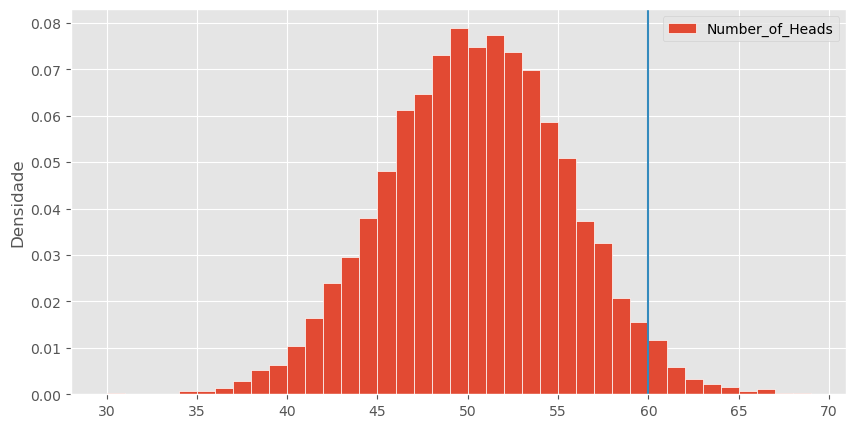

In [55]:
bpd.DataFrame().assign(
    Number_of_Heads=head_counts
).plot(kind = 'hist', bins = np.arange(30, 70), density = True, ec = 'w', figsize = (10, 5));
plt.axvline(60, color = 'C1');
plt.ylabel('Densidade');

- Lembrando que o histograma acima é um _histograma de densidade_, as barras representam _frequências relativas_, e logo _estimativas da probabilidade_ de cada classe.
- Em outras palavras, o histograma descreve a "distribuição das probabilidades de cada um dos valores de caras observados em 100 lançamentos de uma moeda", aproximada por simulação!
    - Introduziremos com mais precisão o conceito de "distribuição de probabilidade" no Tópico 12.

#### Verificando a qualidade da simulação

Nossa probabilidade de "60 caras ou mais em 100 lançamentos de uma moeda", estimada através de simulação, é igual a:

In [59]:
np.mean(head_counts >= 60)

0.0267

Como mencionado anteriormente, conseguimos calcular também essa probabilidade de maneira _exata_/_analítica_, utilizando a [distribuição Binomial](https://en.wikipedia.org/wiki/Binomial_distribution).

Sem adentrar em mais detalhes técnicos, a probabilidade de "60 caras ou mais em 100 lançamentos de uma moeda" calculada através da distribuição Binomial é: 

In [62]:
# A distribuição Binomial é importada do SciPy, e toma parâmetros `n` e `p`.
from scipy.stats import binom
n = 100
p = 0.5
grid = np.arange(60, n + 1, 1)
binom.pmf(grid, n, p).sum()

0.028443966820490395

A simulação produziu um resultado bem próximo ao real! 👍

- Finalmente, podemos ainda sobrepor a distribuição do número de caras em 100 lançamentos calculada através da simulação (histograma, em vermelho) contra os valores exatos correspondentes (gráfico de barras, em azul), calculados através da distribuição Binomial:

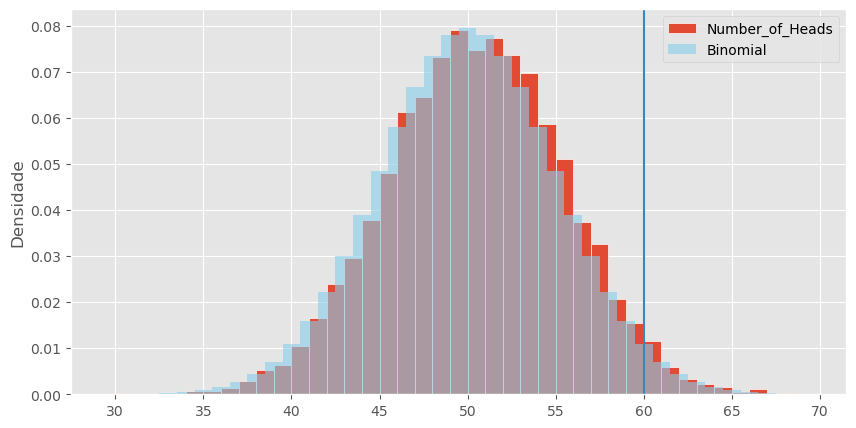

In [65]:
# Histograma: distribuição simulada.
bpd.DataFrame().assign(
    Number_of_Heads=head_counts
).plot(kind = 'hist', bins = np.arange(30, 70), density = True, ec = 'w', figsize = (10, 5));
plt.axvline(60, color = 'C1');
plt.ylabel('Densidade');

# Gráfico de barras: distribuição exata.
n = 100
p = 0.5
x = np.arange(30, 70)
y = binom.pmf(x, n, p)
dd = bpd.DataFrame()
dd = dd.assign(grid = x, probs = y)
plt.bar(x, y, linewidth = 2, color = 'skyblue', alpha = 0.60, width = 1, label = 'Binomial')
plt.legend();

### Exemplo: [O paradoxo dos aniversários](https://en.wikipedia.org/wiki/Birthday_problem)

- Como outro exemplo de uma aplicação das técnicas de simulação para estimar probabilidades, considere o problema que é conhecido popularmente como **"Paradoxo dos Aniversários"**.

- O paradoxo dos aniversários diz que, em uma sala com $n$ pessoas, precisamos de apenas $n = 23$ para que a probabilidade de que duas ou mais pessoas tenham o mesmo aniversário seja maior que $1/2 = 50\%$!
- Esse fato é surpreendente (e logo considerado um "paradoxo") porque a intuição simples nos diria que, como temos $N = 365$ dias em um ano, precisaríamos de $n \simeq 365/2$ pessoas para que a probabilidade de interesse fosse maior ou igual a $1/2$.

- E como será que podemos calcular essa probabilidade via simulação? 🤔

#### Passo 1: Descobrir como fazer o experimento 

- Nesse caso, o experimento aleatório consiste em sortear números de 1 a 365 (os aniversários), e o nosso evento de interesse é o número de pessoas cujos aniversários caem no mesmo dia, em uma sala de $n$ pessoas.

Nota: aqui ignoraremos anos bissextos, e é possível que exista mais de um aniversário que se repita (por exemplo, se 2 pessoas fazem aniversário no dia 05/01 e mais 3 fazem aniversário no dia 08/03, nossa contagem de pessoas será igual a 5).

Como exemplo inicial, vamos tomar $n = 60$, e simular os aniversários:

In [73]:
n = 60
birthdays = np.random.choice(np.arange(1, 365 + 1, 1), n)
birthdays

array([321, 349,  76, 111,  22, 349, 262, 333, 328,  42, 351,  56, 210,
        30, 350, 192, 272, 320,  99, 235,   1, 113,  92, 303,  96,  56,
       302, 208, 134,  34, 164,  39, 259, 315, 230, 129, 101, 355,  33,
       151, 126, 244,  58, 247,  42,  19,  94, 148, 119, 348, 310, 334,
       364,   8, 162, 171, 340,  54, 212, 140])

Agora, para contar o número de valores que _não se repetem_, vamos utilizar `len` e `np.unique`:

In [75]:
np.unique(birthdays)

array([  1,   8,  19,  22,  30,  33,  34,  39,  42,  54,  56,  58,  76,
        92,  94,  96,  99, 101, 111, 113, 119, 126, 129, 134, 140, 148,
       151, 162, 164, 171, 192, 208, 210, 212, 230, 235, 244, 247, 259,
       262, 272, 302, 303, 310, 315, 320, 321, 328, 333, 334, 340, 348,
       349, 350, 351, 355, 364])

In [76]:
len(np.unique(birthdays))

57

E, finalmente, para contar o número de valores que _se repetem_, podemos tomar:

In [78]:
# Note que sempre temos n == len(birthdays) >= len(np.unique(birthdays).
n - len(np.unique(birthdays))

3

Como fizemos anteriormente, vamos agora então encapsular esse comportamento em uma função:

In [80]:
def birthday_experiment(n):
    '''Simulates n birthdays and returns the number of matches.'''
    birthdays = np.random.choice(np.arange(1, 365 + 1, 1), n)
    return n - len(np.unique(birthdays))

In [81]:
birthday_experiment(60)

4

#### Passo 2: Repetir o experimento várias vezes

- Repetimos agora nosso experimento $M = 10000$ vezes, tomando $n = 23$:

In [84]:
# Número de repetições.
repetitions = 10000

# Número de pessoas.
n = 23

# Começamos com um array vazio para armazenar os resultados.
birthday_matches = np.array([])

# Loop for.
for i in np.arange(repetitions):
    # For each repetition, run the experiment and add the result to head_counts
    birthdays = birthday_experiment(n)
    birthday_matches = np.append(birthday_matches, birthdays)

#### Passo 3: Encontrar a proporção de experimentos em que 2 ou mais pessoas tenham o mesmo aniversário

Finalmente, para encontrar o número de experimentos em que o evento de interesse ocorre, fazemos:

In [87]:
at_least_a_birthday_match = np.count_nonzero(birthday_matches >= 1)
at_least_a_birthday_match

5065

e, finalmente, a proporção correspondente é igual a:

In [89]:
p_hat = at_least_a_birthday_match / repetitions
p_hat

0.5065

O paradoxo parece realmente ser verdadeiro!

#### Visualizando a distribuição dos experimentos aleatórios simulados

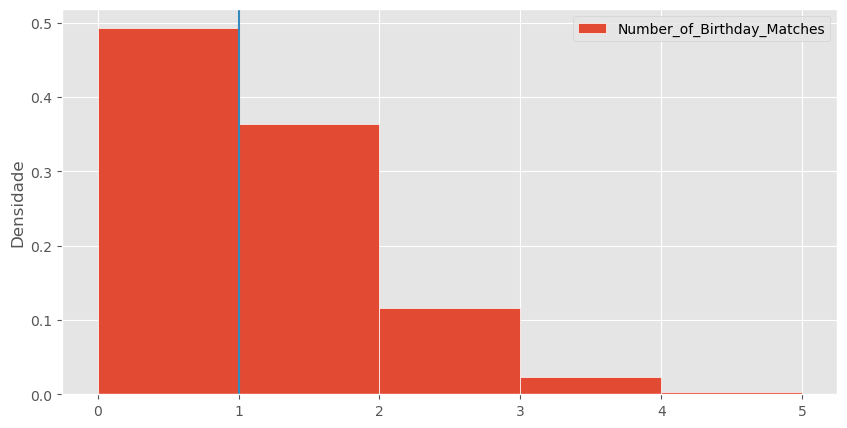

In [92]:
## Histograma: distribuição simulada.
# Escolhendo o número de classes do histograma.
m = int(birthday_matches.max())
bins = np.arange(m + 1)

# Elaborando o histograma.
bpd.DataFrame().assign(
    Number_of_Birthday_Matches = birthday_matches
).plot(kind = 'hist', bins = bins, density = True, ec = 'w', figsize = (10, 5));
plt.axvline(1, color = 'C1');
plt.ylabel('Densidade');

#### Verificando a qualidade da simulação

- É possível calcular analiticamente a probabilidade de que, em uma sala de $n$ pessoas, 2 ou mais pessoas tenham o mesmo aniversário.

- Mais especificamente, defina o evento $A_n = \text{``2 ou mais pessoas tenham o mesmo aniversário''}$, para $n = 1, \ldots, 365$.
- Com um pouco (na verdade muito!) de análise combinatória, é possível mostrar que

\begin{equation*}
    P(A_n) = 1 - \frac{P_{365, n}}{365^n} = 1 - \frac{n! \cdot \binom{365}{n}}{365^n}
\end{equation*}

In [96]:
# Para calcular fatoriais e combinações, importamos o módulo `math`.
import math as math
print(math.factorial(3))
print(math.comb(6, 2))

6
15


In [97]:
# Aqui, calculamos P(A_n) para 1 <= n <= 365.
N = 365
probs = []
for n in np.arange(1, N + 1, 1):
    i_n = int(n)
    prob_an = 1 - (math.factorial(i_n) * math.comb(365, i_n)) / (365 ** i_n)
    probs = np.append(probs, prob_an)

In [98]:
## Finalmente, printamos um DataFrame com `n` e `P(A_n)`.

# Customizando como printar objetos do NumPy e do pandas.
np.set_printoptions(threshold = 20, precision = 2, suppress = True)
pd.set_option("display.max_rows", 40)
pd.set_option("display.max_columns", 8)
pd.set_option("display.precision", 2)

# Printando o DataFrame.
prob = bpd.DataFrame()
prob = prob.assign(n = np.arange(1, N + 1, 1), p_n = probs)
prob

,n,p_n
0,1,0.00e+00
1,2,2.74e-03
2,3,8.20e-03
3,4,1.64e-02
4,5,2.71e-02
...,...,...
360,361,1.00e+00
361,362,1.00e+00
362,363,1.00e+00
363,364,1.00e+00


In [99]:
# Consultando a linha correspondente a n = 23.
prob[prob.get('n') == 23]

,n,p_n
22,23,0.51


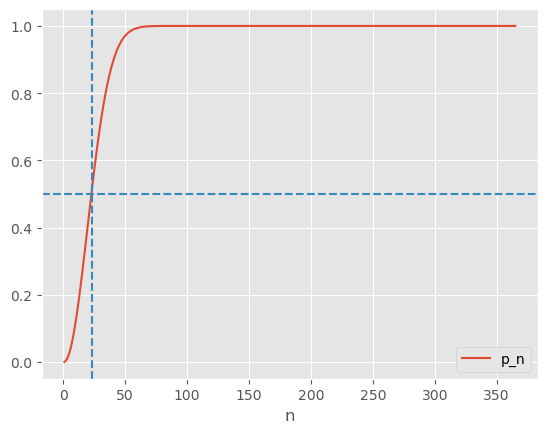

In [100]:
# Alternativamente, podemos fazer um gráfico de linhas com os valores.
prob.plot(x = 'n', y = 'p_n', kind = 'line')
plt.axvline(23, linestyle = '--', color = 'C1');
plt.axhline(0.50, linestyle = '--', color = 'C1');

- Finalmente, a probabilidade calculada através de simulação foi igual a:

In [102]:
p_hat

0.5065

e a calculada de maneira exata foi de:

In [104]:
1 - (math.factorial(23) * math.comb(365, 23)) / (365 ** 23)

0.5072972343239854

Mais uma vez concluímos que ambas são bem próximas! 👍

## Resumo

#### Podemos utilizar simulação para estimar probabilidades

- Calcular probabilidades é importante, mas pode ser difícil!
- A simulação nos permite encontrar probabilidades por meio de computadores em vez de utilizar matemática.
- Alguns cenários do mundo real são muito complicados, e técnicas de simulação podem ser a única solução em muitos destes casos.

#### Como realizar uma simulação

Para estimar a probabilidade de um evento por meio de simulação:
1. Crie uma função que execute o experimento uma vez.
1. Execute essa função muitas e muitas vezes através de um loop `for`, e salve os resultados em um array com `np.append`.
1. Calcule a proporção de vezes que o evento ocorre utilizando `np.count_nonzero`.